In [13]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [14]:
np.random.seed(0)

In [15]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [16]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 17)
(2154048,)
(380127, 17)


In [17]:
test.shape

(380127, 17)

In [18]:
train.shape

(2154048, 19)

In [19]:
full_data = pd.concat([x,test])

In [20]:
full_data.shape

(2534175, 17)

In [21]:
full_data.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)
full_data['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
full_data['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
full_data['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
full_data['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
full_data['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
full_data['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
full_data['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
full_data['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
full_data['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
full_data['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
full_data['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
full_data['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [23]:
num_cols = ["TENURE",'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [24]:
encoder = LabelEncoder()
full_data["TENURE"] = encoder.fit_transform(full_data["TENURE"])
scaler = StandardScaler()
full_data[num_cols] = scaler.fit_transform(full_data[num_cols])

In [41]:
#full_data

In [35]:
#full_data[:2154048]

In [37]:
X_data = full_data[:2154048]
X_data_test = full_data[2154048:]

In [28]:
train.shape

(2154048, 19)

In [36]:
X_data.shape

(2154048, 14)

In [38]:
X_data_test.shape

(380127, 14)

In [39]:
test.shape

(380127, 17)

In [40]:
y.shape

(2154048,)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1077024, 14)
(1077024,)
(1077024, 14)
(1077024,)


In [43]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

### Models

In [44]:
import xgboost
model1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.25,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42) 
#model3.fit(X_train, y_train)

In [51]:
model2 = xgboost.XGBClassifier(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.25,
                 reg_lambda=0.75,
                 subsample=0.6,
                 seed=42) 

### Fitting and predicting

In [45]:
xgboost_model = model1.fit(X_train,y_train)

In [46]:
xgboost_pred_ = xgboost_model.predict(X_test)

In [52]:
xgboost_model2 = model2.fit(X_train,y_train)

In [53]:
xgboost_pred_2 = xgboost_model2.predict_proba(X_test)

In [59]:
xgboost_pred_2[:,1]

array([0.00416341, 0.02904859, 0.1764024 , ..., 0.7199972 , 0.00721025,
       0.21161476], dtype=float32)

In [57]:
#xgboost_pred_

### training on whole data

In [60]:
xgboost_model2_whole_data = model2.fit(X_data,y)

In [61]:
subpred = xgboost_model2_whole_data.predict_proba(X_data_test)

In [69]:
subpred_ = subpred[:,0]

In [75]:
subpred_1 = subpred[:,1]

In [71]:
submission["CHURN"] = subpred_

In [74]:
submission.to_csv('xgboost_submission_proba1.csv', index=False)

In [76]:
subpred_1

array([0.01360905, 0.03301858, 0.00985883, ..., 0.06793969, 0.0357008 ,
       0.12041467], dtype=float32)

In [77]:
sbt = submission

#### this prediction scored 0.29

In [79]:
sbt["CHURN"] = subpred_1

In [81]:
sbt.to_csv('xgboost_submission_proba0.csv', index=False)

# --------------the end-----------------

### Light GBM

In [86]:
import lightgbm as lgb
model3 = lgb.LGBMClassifier()
#clf.fit(X_train, y_train)

In [87]:
lightGBM_model = model3.fit(X_train,y_train)

In [88]:
lightGBM_pred = lightGBM_model.predict_proba(X_test)

In [90]:
lightGBM_model_whole_data = model3.fit(X_data,y)

In [91]:
subpred_3 = lightGBM_model_whole_data.predict_proba(X_data_test)

In [98]:
sbt3 = submission

In [99]:
subpred_3

array([[0.99160457, 0.00839543],
       [0.97544835, 0.02455165],
       [0.9901419 , 0.0098581 ],
       ...,
       [0.86929222, 0.13070778],
       [0.94889987, 0.05110013],
       [0.8623057 , 0.1376943 ]])

In [100]:
sbt3["CHURN"] = subpred_3[:,1]

In [102]:
sbt3.to_csv('lightGBM_submission_proba0.csv', index=False)

In [101]:
sbt3

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.008395
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.024552
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.009858
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.304711
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.282792
5,0000d5ec4e898355a5607fb327e621403c1d76f6,0.114907
6,0000ecce03debd39b0703b24b8ce20b8c06f6bd4,0.002804
7,00010f65a5340264303727655cc554fdfd0da8f2,0.051299
8,000143f911b80a025ccd6a6e5425834b1ae17642,0.008562
9,0001488ec950d9b3502295d00f96099bc412030b,0.106013


#### Artificial Neural Network

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

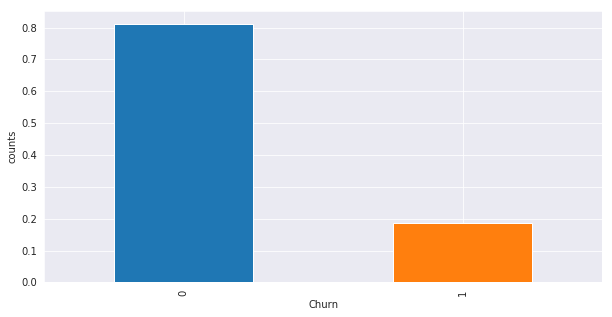

In [106]:
#Check if the predictor class is balanced 
print(y.value_counts())
plt.figure(figsize=(10,5))
y.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [107]:
import lightgbm as lgb
model4 = lgb.LGBMClassifier(boosting_type='dart', 
                            num_leaves=50,
                            max_depth=3, 
                            learning_rate=0.001,
                            n_estimators=10000, 
                            subsample_for_bin=200000, 
                            objective=None,
                            class_weight=None, 
                            min_split_gain=0.0, 
                            min_child_weight=0.001, 
                            min_child_samples=20,
                            subsample=1.0,
                            subsample_freq=0, 
                            colsample_bytree=1.0,
                            reg_alpha=0.0, 
                            reg_lambda=0.0, 
                            random_state=None, 
                            n_jobs=-1, 
                            silent=True,
                            importance_type='split')
#clf.fit(X_train, y_train)

In [109]:
lightGBM_model2 = model4.fit(X_train,y_train)

In [ ]:
lightGBM_pred2 = lightGBM_model2.predict_proba(X_test)

In [111]:
lightGBM_model_whole_data2 = model4.fit(X_data,y)

In [ ]:
subpred_4 = lightGBM_model_whole_data2.predict_proba(X_data_test)

In [ ]:
sbt4= submission

In [ ]:
sbt4["CHURN"] = subpred_4[:,1]

In [ ]:
sbt4.to_csv('lightGBM_parameters_tuned.csv', index=False)